# Cálculo de Métricas de Evaluación para Clasificación:

## Ejemplo/Ejercicio:

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Cargar el conjunto de datos
digits = load_digits()
X, y = digits.data, digits.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo usando regresion logistica
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Mostrar las métricas
print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación o sensibilidad (recall):", recall)
print("Puntuación o medida F1 (F1-score):", f1)

Exactitud: 0.9722222222222222
Precisión: 0.9725599634194969
Recuperación o sensibilidad (recall): 0.9722222222222222
Puntuación o medida F1 (F1-score): 0.9722809227439473


### TAREA en clase/casa (reference - pumpkins homework):

Usando alguna herramienta de IA, consultar (dos versiones: para codificar "a mano" y con código python existente en bobliotecas):

1. Qué es y cómo se obtiene la matriz de confusíón.
2. Analizar el resultado de la matriz de confusión del anterior ejemplo/ejercicio.
3. Obtener las formulas de TP, TN, FP, FN, precision, recall, F1-score, support.
4. Apartir de la matriz de confusión, interpretar los resultados del item 3.
5. Con base en lo anterior, calcular, graficar e interpretar: FPR, TPR, ROC, AUC.


##1. Matriz de confusión##
La matriz de confusión es una herramienta que nos permite visualizar el desempeño de un algoritmo de aprendizaje supervisado, donde las columnas representan la cantidad de predicción por cada clase, mientras que las filas son las instancias de las clases reales, todo esto para decir que la matriz de confusión nos muestra los aciertos y errores del modelo.

In [3]:
# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
print("Matriz de Confusión:\n", cm)

Matriz de Confusión:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]


#2#
Aqui podemos ver que en todos los casos presenta una predicción, pero aún así no podemos dejar de ver los errores que hay, pues si los contamos mirando la matriz podemos contar 10, pero estos son pocos para la cantidad de datos.

#3#

1. TP (True Positives, Verdaderos Positivos): Número de instancias correctamente clasificadas como positivas.
2. TN (True Negatives, Verdaderos Negativos): Número de instancias correctamente clasificadas como negativas.
3. FP (False Positives, Falsos Positivos): Número de instancias incorrectamente clasificadas como positivas.
4. FN (False Negatives, Falsos Negativos): Número de instancias incorrectamente clasificadas como negativas.

### Métricas de Evaluación de un Modelo de Clasificación

**Precisión (Precision):**

$$ \text{Precisión} = \frac{TP}{TP + FP} $$

**Recall (Sensibilidad o Tasa de verdaderos positivos):**

$$ \text{Recall} = \frac{TP}{TP + FN} $$

**F1-Score:**

$$ F1 = 2 \times \frac{\text{Precisión} \times \text{Recall}}{\text{Precisión} + \text{Recall}} $$

**Soporte (Support):**

Para la clase positiva:

$$ \text{Soporte}_{\text{positivo}} = TP + FN $$

Para la clase negativa:

$$ \text{Soporte}_{\text{negativo}} = TN + FP $$

#4#
Observamos que en la mayoria de datos y en los resultados datos por el cálculo de la precisión, recall, f1-score y soporte se da aproximadamente un 97% de acierto, lo cual es un resultado bastante bueno.

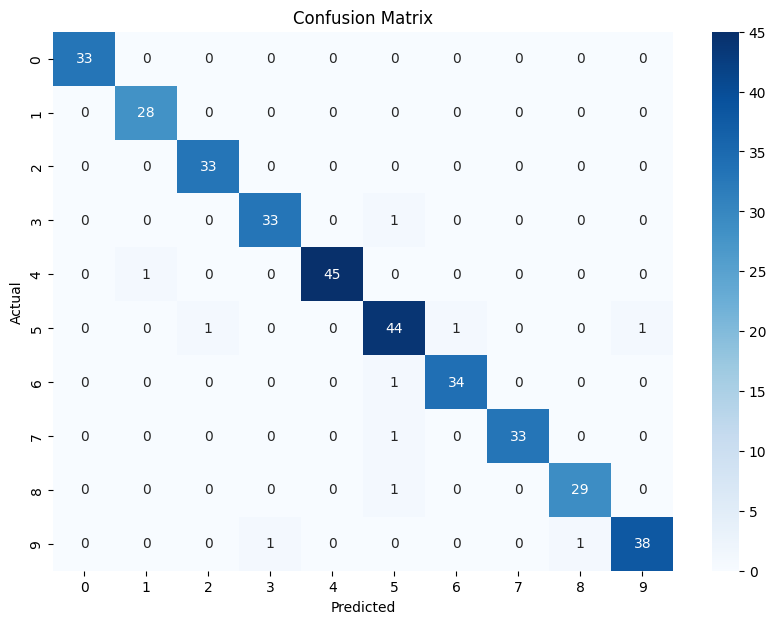

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la matriz de confusión usando un heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#5#

In [12]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize
import numpy as np

# Hacer predicciones de probabilidad en el conjunto de prueba
y_prob = model.predict_proba(X_test)

# Binarizar las etiquetas
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]

# Calcular FPR, TPR y AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

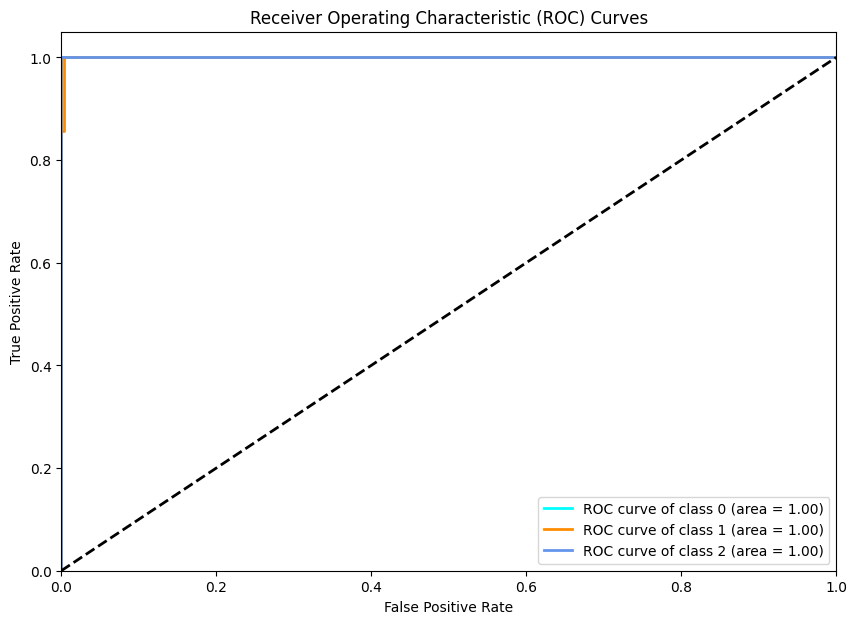

In [13]:
# Graficar la Curva ROC
plt.figure(figsize=(10, 7))
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

FPR (False Positive Rate, Tasa de Falsos Positivos): Es la proporción de negativos reales que se predicen incorrectamente como positivos.

TPR (True Positive Rate, Tasa de Verdaderos Positivos o Sensibilidad): Es la proporción de positivos reales que se predicen correctamente como positivos.

Curva ROC (Receiver Operating Characteristic):
Es una gráfica que muestra la TPR en función de la FPR para diferentes umbrales de decisión. La curva ROC proporciona una manera visual de evaluar la capacidad de un clasificador para distinguir entre clases.

AUC (Area Under the ROC Curve):
El AUC mide el área bajo la curva ROC. Un AUC de 1.0 indica un clasificador perfecto, mientras que un AUC de 0.5 indica un clasificador que no es mejor que uno aleatorio. El AUC es una medida agregada del rendimiento del clasificador en todos los posibles umbrales de clasificación.